In [168]:

import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import textwrap
import shutil

screen_width = shutil.get_terminal_size().columns

sequence_path = "RadarScenes/RadarScenes/data/sequence_2/"

file_path = sequence_path + "radar_data.h5"
annotations_path = sequence_path + "scenes.json"

    


In [169]:


def explore_hdf5(file_path):
    """
    Explore the structure of an HDF5 file and print its hierarchy.
    """
    def print_structure(name, obj):
        if isinstance(obj, h5py.Group):
            print(f"Group: {name}")
        elif isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name} | Shape: {obj.shape} | Dtype: {obj.dtype}")

    with h5py.File(file_path, 'r') as h5_file:
        h5_file.visititems(print_structure)

# Struktur ausgeben
explore_hdf5(file_path)

Dataset: odometry | Shape: (14526,) | Dtype: [('timestamp', '<i8'), ('x_seq', '<f4'), ('y_seq', '<f4'), ('yaw_seq', '<f4'), ('vx', '<f4'), ('yaw_rate', '<f4')]
Dataset: radar_data | Shape: (1029753,) | Dtype: [('timestamp', '<i8'), ('sensor_id', 'u1'), ('range_sc', '<f4'), ('azimuth_sc', '<f4'), ('rcs', '<f4'), ('vr', '<f4'), ('vr_compensated', '<f4'), ('x_cc', '<f4'), ('y_cc', '<f4'), ('x_seq', '<f4'), ('y_seq', '<f4'), ('uuid', 'S32'), ('track_id', 'S32'), ('label_id', 'u1')]


In [170]:

with h5py.File(file_path, 'r') as h5_file:
    data=h5_file["radar_data"]
    print(data[:])
    

[(158195645746, 2, 13.369212,  0.51926255,  19.847147,  0.32724422,  4.6259241e+00, 17.183104 ,   0.40939516, 3773.19  , -2648.0535, b'7b97ee9873d1e39618e87a9d501d1f87', b'f99a5364d1b311e69736bcaec523183d',  2)
 (158195645746, 2, 14.528947,  0.557184  ,   9.223602,  0.32744753,  4.6106968e+00, 18.28272  ,   1.0536921 , 3772.264 , -2648.929 , b'b4fcb9217418b44d7b514879385c3d18', b'f99a5364d1b311e69736bcaec523183d',  2)
 (158195645746, 2, 15.411259,  0.6681375 ,   8.326876,  0.3135881 ,  4.5164390e+00, 18.85854  ,   2.842702  , 3772.1062, -2650.8018, b'd6b1ffdf7e28caa36a30e629e4768025', b'', 11)
 ...
 (158337396943, 3, 17.850048,  0.57739633, -12.423521, -0.0181565 , -1.8663593e-02, 13.302345 ,  15.8481455 , 2818.0647, -2880.5298, b'495cb1f9dfb90cf7d64afcb68f3985fa', b'', 11)
 (158337396943, 3, 18.928768,  0.916114  ,   8.338636,  0.0087512 ,  8.1200488e-03,  7.9664745,  19.177963  , 2824.3508, -2880.739 , b'fb87c7b196e11778b8bcd47cd7124129', b'', 11)
 (158337396943, 3, 93.19532 , -1.058

<Closed HDF5 dataset>


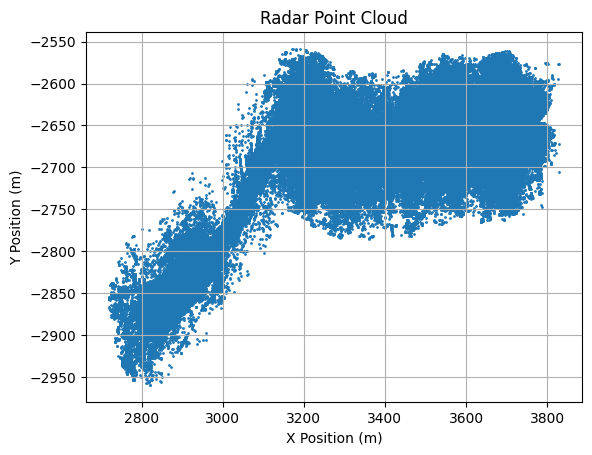

In [171]:
# 2D-Visualisierung
with h5py.File(file_path, 'r') as h5_file:
    x=h5_file["radar_data"]["x_seq"][:]
    y=h5_file["radar_data"]["y_seq"][:]

print(data)
plt.scatter(x, y, s=1)
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Radar Point Cloud')
plt.grid()
plt.show()

### Radarpunkte eines timestamps

timestamp: 156864184066
{'sequence_name': 'sequence_1', 'category': 'train', 'first_timestamp': 156862647501, 'last_timestamp': 156949185824, 'scenes': {'156862647501': {'sensor_id': 1, 'prev_timestamp': None, 'next_timestamp': 156862659751, 'prev_timestamp_same_sensor': None, 'next_timestamp_same_sensor': 156862719325, 'odometry_timestamp': 156862651599, 'odometry_index': 365, 'image_name': '156862567343.jpg', 'radar_indices': [0, 3]}, '156862659751': {'sensor_id': 2, 'prev_timestamp': 156862647501, 'next_timestamp': 156862695773, 'prev_timestamp_same_sensor': None, 'next_timestamp_same_sensor': 156862735209, 'odometry_timestamp': 156862661653, 'odometry_index': 366, 'image_name': '156862567343.jpg', 'radar_indices': [3, 100]}, '156862695773': {'sensor_id': 4, 'prev_timestamp': 156862659751, 'next_timestamp': 156862701077, 'prev_timestamp_same_sensor': None, 'next_timestamp_same_sensor': 156862768707, 'odometry_timestamp': 156862691606, 'odometry_index': 369, 'image_name': '1568625673

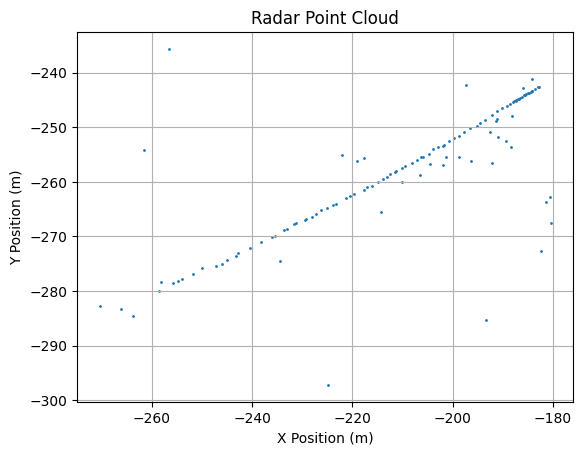

 
label_id: semantic class id of the object to which this detection belongs.
passenger cars (0), large vehicles (like agricultural or construction vehicles)
(1), trucks (2), busses (3), trains (4), bicycles (5), motorized two-wheeler
(6), pedestrians (7), groups of pedestrian (8), animals (9), all other dynamic
objects encountered while driving (10), and the static environment (11)
label IDs: [11, 0]
 
RadarScenes/RadarScenes/data/sequence_1/scenes.json


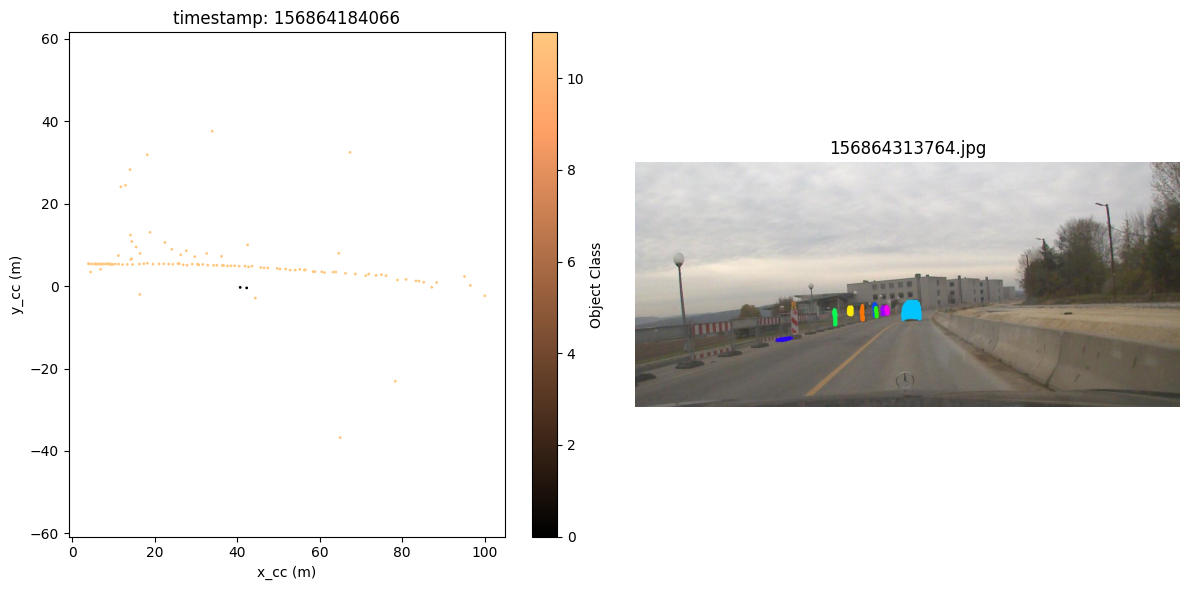

In [52]:
with h5py.File(file_path, 'r') as h5_file:
    radar_data = h5_file['radar_data'][:]

timestamp = radar_data["timestamp"][6000]
print(f"timestamp: {timestamp}")

# Filter aufstellen: Nur Einträge mit gleichem Timestamp
mask = radar_data["timestamp"][:] == timestamp
x_cc = radar_data['x_cc'][mask]
y_cc = radar_data['y_cc'][mask]
labels = radar_data['label_id'][mask]


# 2D-Visualisierung
x=radar_data["x_seq"][mask]
y=radar_data["y_seq"][mask]

print(data)
plt.scatter(x, y, s=1)
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Radar Point Cloud')
plt.grid()
plt.show()


label_is_in_labels = []
for label in labels:
    if label not in label_is_in_labels:
        label_is_in_labels.append(label)
text=("label_id: semantic class id of the object to which this detection belongs. passenger cars (0), large vehicles (like agricultural or construction vehicles) (1), trucks (2), busses (3), trains (4), bicycles (5), motorized two-wheeler (6), pedestrians (7), groups of pedestrian (8), animals (9), all other dynamic objects encountered while driving (10), and the static environment (11)")
wrapped_text = textwrap.fill(text, width=screen_width)
print(" ")
print(wrapped_text)
print(f"label IDs: {label_is_in_labels}")
print(" ")
    
# subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the point cloud
scatter = ax1.scatter(x_cc, y_cc, c=labels, cmap='copper', s=1)
cbar = plt.colorbar(scatter, ax=ax1, label='Object Class')
ax1.set_xlabel('x_cc (m)')
ax1.set_ylabel('y_cc (m)')
ax1.set_title("timestamp: " + str(timestamp))
ax1.axis('equal')


# Plot picture
print(annotations_path)
with open(annotations_path, 'r', encoding='utf-8') as json_file:
    annotations = json.load(json_file)
image_name = annotations["scenes"][str(timestamp)]["image_name"]
image_path = sequence_path +"camera//"+ image_name
image = mpimg.imread(image_path)
ax2.imshow(image)
ax2.axis('off')  # Achsen ausblenden
ax2.set_title(image_name)

plt.tight_layout()
plt.show()


### Radarpunkte eines aller Timestamps die einem Bild zugeordnet sind 

Gefundene Szenen: ['156866742352', '156866757896', '156866781555', '156866785659', '156866817096', '156866831650', '156866856624', '156866860189', '156866892050', '156866904355', '156866930720', '156866934106', '156866966282', '156866976556', '156867003851', '156867007803', '156867039164', '156867050855', '156867079813', '156867081524', '156867113205', '156867124525']


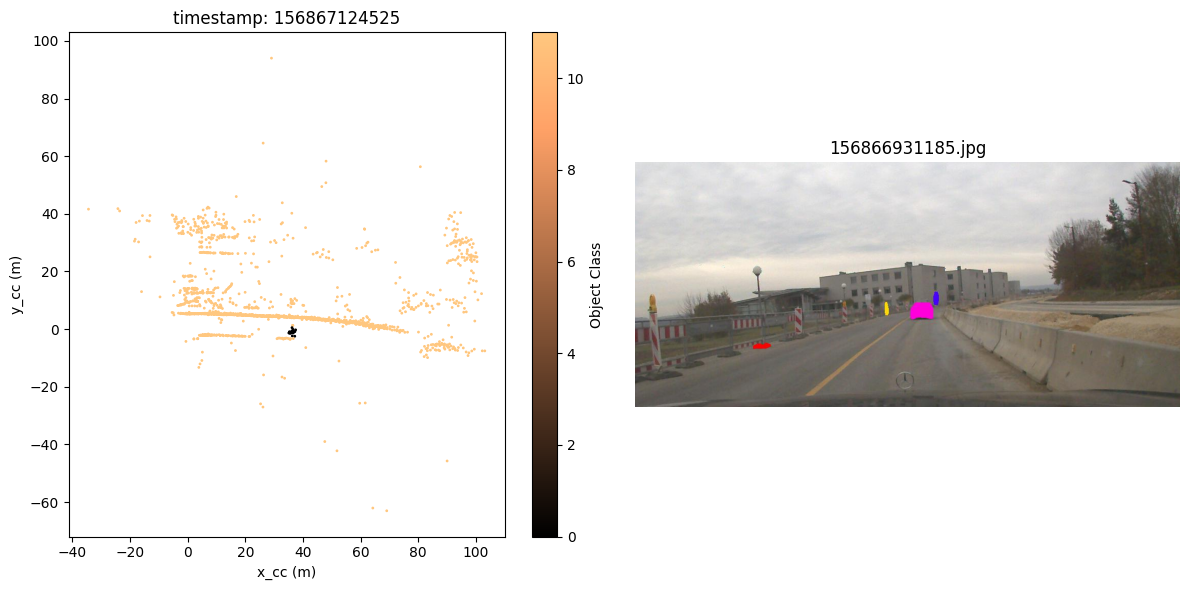

In [54]:
import json
import h5py
import matplotlib.pyplot as plt

# Define the image name to search for
target_image_name = "156866931185.jpg"
picture = target_image_name

# Load the JSON data from the file
with open('RadarScenes/RadarScenes/data/sequence_1/scenes.json', 'r') as file:
    data = json.load(file)

matching_scene_names = [timestamp for timestamp, scene in data['scenes'].items() if scene['image_name'] == target_image_name]
print("Gefundene Szenen:", matching_scene_names)

# Load radar data from HDF5 file
with h5py.File(file_path, 'r') as h5_file:
    radar_data = h5_file['radar_data'][:]

x_cc = []
y_cc = []
labels = []
for timestamp in matching_scene_names:
    # Filter aufstellen: Nur Einträge mit gleichem Timestamp
    mask = radar_data["timestamp"][:] == int(timestamp)
    if not mask.any():
        print(f"Keine Daten für Timestamp: {timestamp}")
    x_cc.extend(radar_data['x_cc'][mask])
    y_cc.extend(radar_data['y_cc'][mask])
    labels.extend(radar_data['label_id'][mask])

# Plot the point cloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the point cloud
scatter = ax1.scatter(x_cc, y_cc, c=labels, cmap='copper', s=1)
cbar = plt.colorbar(scatter, ax=ax1, label='Object Class')
ax1.set_xlabel('x_cc (m)')
ax1.set_ylabel('y_cc (m)')
ax1.set_title("timestamp: " + str(timestamp))
ax1.axis('equal')

# Plot picture
annotations_path = 'RadarScenes/RadarScenes/data/sequence_1/scenes.json'
with open(annotations_path, 'r', encoding='utf-8') as json_file:
    annotations = json.load(json_file)
image_name = annotations["scenes"][str(timestamp)]["image_name"]
image_path = 'RadarScenes/RadarScenes/data/sequence_1/camera/' + image_name
image = plt.imread(image_path)
ax2.imshow(image)
ax2.axis('off')  # Achsen ausblenden
ax2.set_title(image_name)

plt.tight_layout()
plt.show()